In [57]:
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tfd = tfp.distributions

In [5]:
# Create a normal distribution from Tensorflow Distributions

normal = tfd.Normal(loc=0, scale=1)
normal

<tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>

In [6]:
# Sample from the chosen distribution

normal.sample()

<tf.Tensor: shape=(), dtype=float32, numpy=-0.5608658>

In [17]:
# Sample multiple times

normal.sample(10)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-0.76350427, -1.21658   ,  0.28508797, -0.33124852,  0.32807463,
       -0.17158726, -0.6110937 ,  0.39812204, -0.3953191 ,  1.3045082 ],
      dtype=float32)>

In [8]:
# Obtain value of probability density

normal.prob(0)

<tf.Tensor: shape=(), dtype=float32, numpy=0.3989423>

In [9]:
# Obtain value of logprobability

normal.log_prob(0)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.9189385>

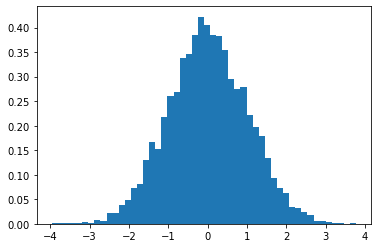

In [38]:
# Plot a histogram, approximating the density

plt.hist(normal.sample(10000).numpy(), bins=50, density=True)
plt.show()

In [15]:
# Do the same for the exponential distribution

exponential = tfd.Exponential(rate=1)

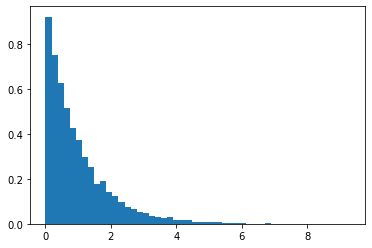

In [40]:
plt.hist(exponential.sample(10000).numpy(), bins=50, density=True)
plt.show()

In [44]:
# Create a Bernoulli distribution (discrete)

bernoulli = tfd.Bernoulli(probs=0.8)

In [45]:
# Sample as before

bernoulli.sample(10)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int32)>

### A word of caution on discrete distributions

In [52]:
# Calculate Bernoulli prob and see that 0.5 and -1 do not give the correct probability!

for k in [0, 0.5, 1, -1]:
    print('prob result {} for k = {}'.format(bernoulli.prob(k), k))

prob result 0.19999998807907104 for k = 0
prob result 0.3999999761581421 for k = 0.5
prob result 0.800000011920929 for k = 1
prob result 0.04999999701976776 for k = -1


Probability mass function is not define at points 0.5 or -1, neverthelesss tfp returns values for these points.

In [53]:
# Replicate the scores to see what is occuring under the hood

def my_bernoulli(p_success, k):
    return np.power(p_success, k)*np.power((1-p_success), (1-k))

In [58]:
# Evaluate it as before

for k in [0, 0.5, 1, -1]:
    print('prob result {} for k = {} '.format(my_bernoulli(p_success=0.8, k=k), k))

prob result 0.19999999999999996 for k = 0 
prob result 0.3999999999999999 for k = 0.5 
prob result 0.8 for k = 1 
prob result 0.049999999999999975 for k = -1 


### Work with batch distributions

In [59]:
# Create a batched Bernoulli distribution

bernoulli_batch = tfd.Bernoulli(probs=[0.1, 0.25, 0.5, 0.75, 0.9])

In [60]:
bernoulli_batch

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[5] event_shape=[] dtype=int32>

In [61]:
# Sample from it, notice the shape

bernoulli_batch.sample(5)

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[0, 1, 1, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 1],
       [0, 0, 0, 1, 1],
       [0, 0, 1, 1, 1]], dtype=int32)>

In [62]:
# Use a batch shape with higher rank

probs = [[[0.5, 0.5],
          [0.8, 0.3],
          [0.25, 0.75]]]

bernoulli_batch_2D = tfd.Bernoulli(probs=probs)
bernoulli_batch_2D

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[1, 3, 2] event_shape=[] dtype=int32>

In [63]:
bernoulli_batch_2D.sample(5)

<tf.Tensor: shape=(5, 1, 3, 2), dtype=int32, numpy=
array([[[[1, 0],
         [0, 0],
         [0, 0]]],


       [[[0, 0],
         [1, 0],
         [1, 1]]],


       [[[1, 0],
         [1, 0],
         [0, 1]]],


       [[[0, 0],
         [1, 0],
         [0, 1]]],


       [[[1, 0],
         [1, 1],
         [0, 1]]]], dtype=int32)>

In [64]:
# Determine probabilities from this batch distribution

bernoulli_batch_2D.prob([[[1, 0],
                         [0, 0],
                         [1, 1]]])

<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[0.5       , 0.5       ],
        [0.19999999, 0.7       ],
        [0.25      , 0.75      ]]], dtype=float32)>